<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La ecuacion de la membrana rectangular es:
$$\frac{\partial ^2 u}{\partial t^2} = c^2 (\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2})$$
que satisfaga la condicion de frontera $u=o$ \\
y las condiciones iniciales $u(x,y,0)=f(x,y)$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

a = 4
b = 2

c = 1

Para la funcion $$f(x,y)=0.1(4x-x^2)(2y-y^2)$$

In [ ]:
def f(x, y):
    return 0.1 * (4 * x - x**2) * (2 * y - y**2)

N = 10
M = 10

Se calculan los coeficientes de $A_n m$

In [7]:
def coeficientes_A(a, b, N, M):
    A_nm = np.zeros((N, M))
    for n in range(1, N + 1):
        for m in range(1, M + 1):
            integrand = lambda x, y: f(x, y) * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b)

            x_vals = np.linspace(0, a, 100)
            y_vals = np.linspace(0, b, 100)
            integral = 0
            for xi in x_vals:
                for yi in y_vals:
                    integral += integrand(xi, yi) * (a / 100) * (b / 100)

            A_nm[n - 1, m - 1] = (4 / (a * b)) * integral

    return A_nm

A_nm =coeficientes_A(a, b, N, M)

Funcion de desplazamiento $u(x,y,t)$

In [8]:
def u(x, y, t, A_nm, a, b, c, N, M):
    suma = 0
    for n in range(1, N + 1):
        for m in range(1, M + 1):
            omega_nm = c * np.sqrt((n * np.pi / a)**2 + (m * np.pi / b)**2)
            suma += A_nm[n - 1, m - 1] * np.cos(omega_nm * t) * np.sin(n * np.pi * x / a) * np.sin(m * np.pi * y / b)
    return suma


x_vals = np.linspace(0, a, 100)
y_vals = np.linspace(0, b, 100)
x, y = np.meshgrid(x_vals, y_vals)

Con $u(x,y,o)$

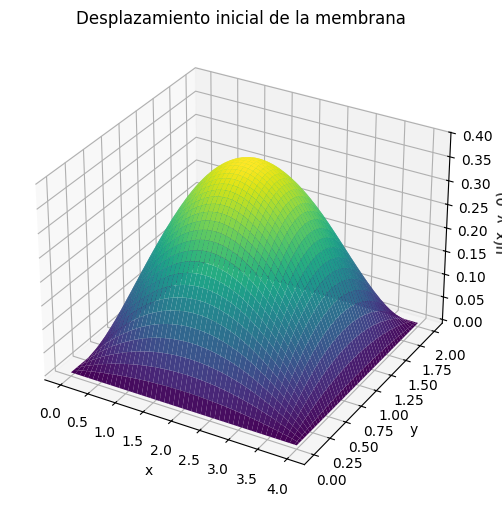

In [9]:
t = 0

u_vals = np.array([[u(xi, yi, t, A_nm, a, b, c, N, M) for xi in x_vals] for yi in y_vals])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, u_vals, cmap='viridis')
ax.set_title("Desplazamiento inicial de la membrana")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x, y, 0)")
plt.show()